<a href="https://colab.research.google.com/github/ah1997/Stochastic/blob/Sandpile/MS763cw4sols_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Applied Markov Processes | solutions to numerical questions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

In [ ]:
# Magic command for vectorised figures
%config InlineBackend.figure_format = 'svg'

## Q3 Simple random walk

### (a)

Generate the trajectories and plot them:

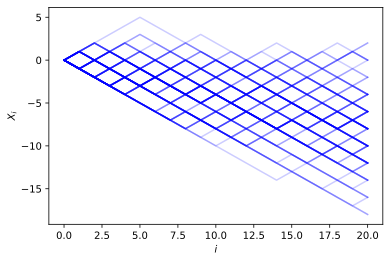

In [ ]:
# Parameters
ntraj = 100
n = 20
p = 0.3

# Container for trajectories
xtraj = np.zeros(n+1, float)

# Simulation
for j in range(ntraj):
    for i in range(n):
        xtraj[i+1] = xtraj[i]+2.0*np.random.binomial(1, p)-1.0

    plt.plot(range(n+1), xtraj, 'b-', alpha=0.2)

plt.xlabel(r'$i$')
plt.ylabel(r'$X_i$')

### (b)

Repeat the simulation of part (a) but only keep the last state at time $n=5$ to construct a big-enough sample and its histogram, which is compared with the expected binomial distribution. Note that the latter is translated because, as seen in class, we consider $\pm 1$ jumps as opposed to the $0, 1$ (Bernoulli) values used in the standard binomial distribution.

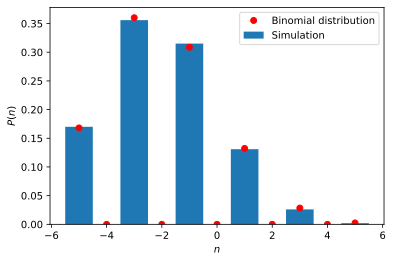

In [ ]:
# Parameters
ntraj = 10**3
n = 5
p = 0.3

# Containers
xsample = np.zeros(ntraj, float)
vallist = np.arange(-n, n+1, 1.0)
binspec = np.arange(-n-0.5, n+1.5, 1.0)

# Simulation
for j in range(ntraj):
    x = 0
    for i in range(n):
        x = x+2.0*np.random.binomial(1, p)-1.0

    # Keep final state
    xsample[j] = x

# Translated binomial distribution
bindist = np.zeros(2*n+1)
for k in range(n+1):
    bindist[2*k] = binom.pmf(k, n, p)

# Histogram
plt.hist(xsample, bins=binspec, density=True, label='Simulation')
plt.plot(vallist, bindist, 'ro', label='Binomial distribution')
plt.legend(loc='upper right')
plt.xlabel(r'$n$')
plt.ylabel(r'$P(n)$')

### (c)

## Q4 Brownian motion

### (a)

We simulate the trajectories as seen in class.

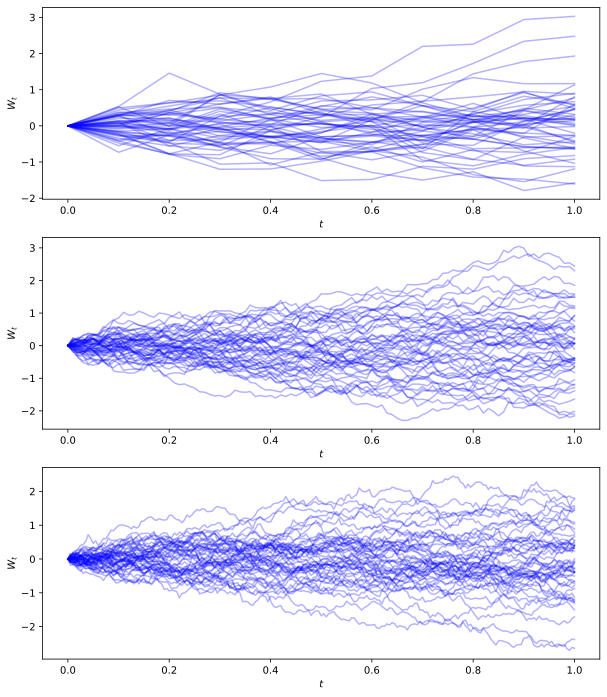

In [ ]:
# Parameters
ntraj = 50
tfinal = 1.0
dtlist = [0.1, 0.01, 0.005]

plt.figure(figsize=(10, 12))

# Loop on different dt
for k in range(len(dtlist)):
    dt = dtlist[k]
    n = int(tfinal/dt)
    x = np.zeros(n+1, float)

    # Create plot space
    plt.subplot(3, 1, k+1)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$W_t$')

    # Generate many trajectories
    for j in range(ntraj):

        # Time simulation
        for i in range(n):
            x[i+1] = x[i]+np.sqrt(dt)*np.random.randn()

        # Plot trajectory just computed
        plt.plot(np.linspace(0, tfinal, n+1), x, 'b-', alpha=0.3)

Analysis:

### (b)

The simulation below suggests that the dispersion of $W_t$ does grow like $\sqrt{t}$.

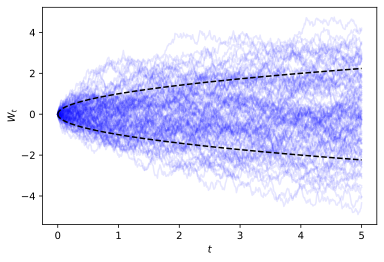

In [ ]:
ntraj = 10**2
tfinal = 5.0
dt = 0.01
n = int(tfinal/dt)
x = np.zeros(n+1, float)
trange = np.linspace(0, tfinal, n+1)

for j in range(ntraj):
    for i in range(n):
        x[i+1] = x[i]+np.sqrt(dt)*np.random.randn()

    plt.plot(trange, x, 'b-', alpha=0.1)

plt.plot(trange, [(lambda t: np.sqrt(t))(t) for t in trange], 'k--',
         trange, [(lambda t: -np.sqrt(t))(t) for t in trange], 'k--')
plt.xlabel(r'$t$')
plt.ylabel(r'$W_t$');

To check this quantitatively, we simulate many trajectories and calculate their standard deviation at fixed times.

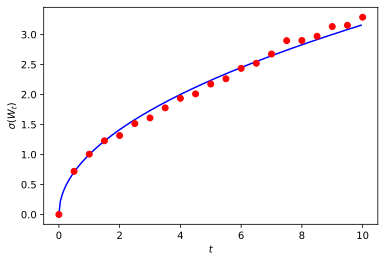

In [ ]:
ntraj = 10**2
tfinal = 10.0
tsample = 0.5
dt = 0.01

n = int(tfinal/dt)
m = int(tfinal/tsample)

std_dev_list = [0]
std_dev_err_list = []
x = np.zeros([ntraj, n+1], float)

# Simulation with time and sample loops inverted
for i in range(n):
    for j in range(ntraj):
        x[j, i+1] = x[j, i]+np.sqrt(dt)*np.random.randn()

    # Compute standard deviation at every tsample time
    t = (i+1)*dt
    if t % tsample == 0.0:
        std_dev = np.std(x[:, i])
        std_dev_list.append(std_dev)

plt.plot(np.arange(0.0, tfinal, 0.05), np.sqrt(
    np.arange(0.0, tfinal, 0.05)), 'b-')
plt.plot(np.arange(0.0, tfinal+tsample, tsample), std_dev_list, 'ro')
plt.xlabel(r'$t$')
plt.ylabel(r'$\sigma(W_t)$');

The fit is good for $10^2$ samples and become near perfect for $10^3$ samples.

### (c)

We use more or less the same simulation as above, but now plot the histogram of the sample of trajectories at different times.

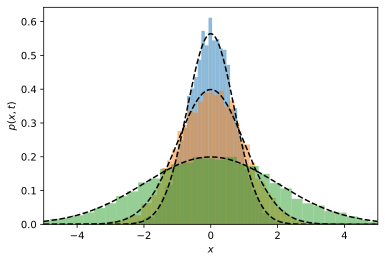

In [ ]:
ntraj = 10**4
tfinal = 4.0
tcheck = [0.5, 1.0, 4.0]
dt = 0.01
xv = 5.0

n = int(tfinal/dt)
m = int(tfinal/tsample)

x = np.zeros([ntraj, n+1], float)
xrange = np.arange(-xv, xv, 0.01)

for i in range(n):
    for j in range(ntraj):
        x[j, i+1] = x[j, i]+np.sqrt(dt)*np.random.randn()

    # Compute histogram at every tsample
    t = (i+1)*dt
    if t in tcheck:
        plt.hist(x[:, i], bins=50, density=True, alpha=0.5)
        plt.plot(xrange, norm.pdf(xrange, 0.0, np.sqrt(t)), 'k--')

plt.xlim([-xv, xv])
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x,t)$')

## Q5 Planar Brownian motion

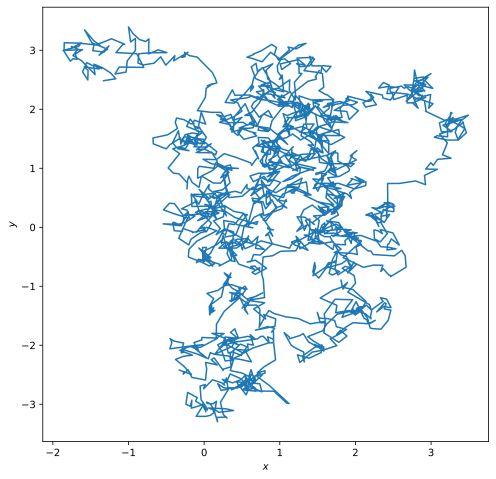

In [ ]:
tfinal = 20.0
dt = 0.01

n = int(tfinal/dt)
xtraj = np.zeros(n+1)
ytraj = np.zeros(n+1)

for i in range(n):
    xtraj[i+1] = xtraj[i]+np.sqrt(dt)*np.random.randn()
    ytraj[i+1] = ytraj[i]+np.sqrt(dt)*np.random.randn()

plt.figure(figsize=(8, 8))
plt.plot(xtraj, ytraj)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');